In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data = pd.read_csv('Cirhossis Dataset.csv')
data

ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0         Y     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1         Y     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2         N     S        1.4        176.0     3.48   210.0     516.0   96.10   
3         Y     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4         Y     N        3.4        279.0     3.53   143.0     671.0  113.15   
..      ...   ...        ...          ...      ...     ...       ...     ...   
413     NaN     N        1.2          NaN     2.96     NaN       NaN     NaN   
414     NaN     N        0.9          NaN     3.83     NaN       NaN     NaN   
415     NaN     N        1.6          NaN     3.42     NaN       NaN     NaN   
416     NaN     N        0.8          NaN     3.75     NaN       NaN     NaN   
417     NaN     N        0.7          NaN     3.29     NaN       NaN     NaN   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413            NaN      174.0         10.9    3.0  
414            NaN      180.0         11.2    4.0  
415            NaN      143.0          9.9    3.0  
416            NaN      269.0         10.4    3.0  
417            NaN      350.0         10.6    4.0  

[418 rows x 20 columns]

In [ ]:
data.describe()

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           418 non-null    object 
 4   Age            418 non-null    float64
 5   Sex            418 non-null    object 
 6   Ascites        418 non-null    object 
 7   Hepatomegaly   418 non-null    object 
 8   Spiders        418 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [192]:
cat_features = []
lis = list(data.columns)
for i in lis:
    if data[i].dtype == "object":
        cat_features.append(i)
cat_features

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [197]:
data = data.dropna(subset=['Drug'])

In [198]:
#CEK DATA NULL
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [199]:
lii = list(data["Status"])
lii

['D',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'CL',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C'

In [200]:
status = []
for i in range(len(lii)):
    if lii[i]=="D":
        status.append(0)
    elif lii[i]=="C":
        status.append(1)
    else :
        status.append(2)
status

[0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,


In [202]:
data["status"] = status

In [203]:
data = data.drop(["Status"], axis=1)

In [204]:
data["Age"] = (data["Age"].values/365).round()
data.head()

ID  N_Days             Drug   Age Sex Ascites Hepatomegaly Spiders Edema  \
0   1     400  D-penicillamine  59.0   F       Y            Y       Y     Y   
1   2    4500  D-penicillamine  56.0   F       N            Y       Y     N   
2   3    1012  D-penicillamine  70.0   M       N            N       N     S   
3   4    1925  D-penicillamine  55.0   F       N            Y       Y     S   
4   5    1504          Placebo  38.0   F       N            Y       Y     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0       14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
1        1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
2        1.4        176.0     3.48   210.0     516.0   96.10           55.0   
3        1.8        244.0     2.54    64.0    6121.8   60.63           92.0   
4        3.4        279.0     3.53   143.0     671.0  113.15           72.0   

   Platelets  Prothrombin  Stage  status  
0      190.0         12.2    4.0       0  
1      221.0         10.6    3.0       1  
2      151.0         12.0    4.0       0  
3      183.0         10.3    4.0       0  
4      136.0         10.9    3.0       2

In [205]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [206]:
data.describe().transpose().style.background_gradient(cmap = 'GnBu')

<ipython-input-207-ea303e583df7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = data.corr()


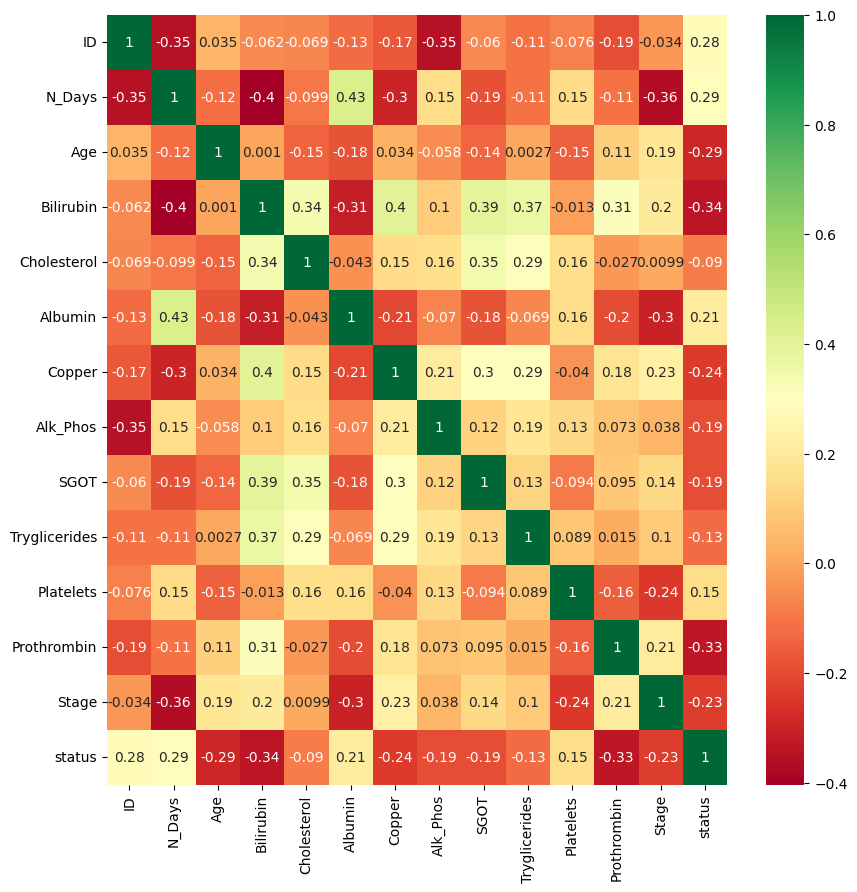

In [207]:
#Korelasi menggunakan heatmap
import seaborn as sns

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [208]:
#korelasi data
data.corr()

<ipython-input-208-4739eaf6a0c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


ID    N_Days       Age  Bilirubin  Cholesterol   Albumin  \
ID             1.000000 -0.354305  0.034797  -0.062154    -0.069327 -0.128924   
N_Days        -0.354305  1.000000 -0.122775  -0.403953    -0.099322  0.430829   
Age            0.034797 -0.122775  1.000000   0.001004    -0.145525 -0.181417   
Bilirubin     -0.062154 -0.403953  0.001004   1.000000     0.336882 -0.314177   
Cholesterol   -0.069327 -0.099322 -0.145525   0.336882     1.000000 -0.043022   
Albumin       -0.128924  0.430829 -0.181417  -0.314177    -0.043022  1.000000   
Copper        -0.171115 -0.295723  0.033816   0.403761     0.145910 -0.209024   
Alk_Phos      -0.350981  0.152368 -0.058079   0.104675     0.157995 -0.070010   
SGOT          -0.060318 -0.187930 -0.138504   0.392112     0.347222 -0.180947   
Tryglicerides -0.110382 -0.111453  0.002687   0.370330     0.291750 -0.068509   
Platelets     -0.076032  0.146144 -0.146535  -0.012988     0.159034  0.155421   
Prothrombin   -0.191959 -0.110685  0.113414   0.312007    -0.027259 -0.198405   
Stage         -0.033911 -0.362013  0.187573   0.200314     0.009930 -0.302190   
status         0.282580  0.289630 -0.291425  -0.340497    -0.090045  0.210913   

                 Copper  Alk_Phos      SGOT  Tryglicerides  Platelets  \
ID            -0.171115 -0.350981 -0.060318      -0.110382  -0.076032   
N_Days        -0.295723  0.152368 -0.187930      -0.111453   0.146144   
Age            0.033816 -0.058079 -0.138504       0.002687  -0.146535   
Bilirubin      0.403761  0.104675  0.392112       0.370330  -0.012988   
Cholesterol    0.145910  0.157995  0.347222       0.291750   0.159034   
Albumin       -0.209024 -0.070010 -0.180947      -0.068509   0.155421   
Copper         1.000000  0.207349  0.298923       0.292236  -0.039929   
Alk_Phos       0.207349  1.000000  0.122071       0.186250   0.133573   
SGOT           0.298923  0.122071  1.000000       0.130853  -0.093715   
Tryglicerides  0.292236  0.186250  0.130853       1.000000   0.088892   
Platelets     -0.039929  0.133573 -0.093715       0.088892   1.000000   
Prothrombin    0.182494  0.073408  0.094550       0.014831  -0.155655   
Stage          0.232149  0.037905  0.143568       0.099879  -0.239594   
status        -0.236559 -0.193493 -0.193854      -0.127201   0.151839   

               Prothrombin     Stage    status  
ID               -0.191959 -0.033911  0.282580  
N_Days           -0.110685 -0.362013  0.289630  
Age               0.113414  0.187573 -0.291425  
Bilirubin         0.312007  0.200314 -0.340497  
Cholesterol      -0.027259  0.009930 -0.090045  
Albumin          -0.198405 -0.302190  0.210913  
Copper            0.182494  0.232149 -0.236559  
Alk_Phos          0.073408  0.037905 -0.193493  
SGOT              0.094550  0.143568 -0.193854  
Tryglicerides     0.014831  0.099879 -0.127201  
Platelets        -0.155655 -0.239594  0.151839  
Prothrombin       1.000000  0.205981 -0.333499  
Stage             0.205981  1.000000 -0.228964  
status           -0.333499 -0.228964  1.000000

In [209]:
#statistika dasar
data.describe()

ID       N_Days         Age   Bilirubin  Cholesterol  \
count  418.000000   418.000000  418.000000  418.000000   418.000000   
mean   209.500000  1917.782297   50.772727    3.220813   350.272727   
std    120.810458  1104.672992   10.442880    4.407506   193.123893   
min      1.000000    41.000000   26.000000    0.300000   120.000000   
25%    105.250000  1092.750000   43.000000    0.800000   273.000000   
50%    209.500000  1730.000000   51.000000    1.400000   309.500000   
75%    313.750000  2613.500000   58.000000    3.400000   347.750000   
max    418.000000  4795.000000   78.000000   28.000000  1775.000000   

          Albumin      Copper      Alk_Phos        SGOT  Tryglicerides  \
count  418.000000  418.000000    418.000000  418.000000     418.000000   
mean     3.497440   91.279904   1799.144976  120.564067     119.267943   
std      0.424972   74.485481   1875.121982   49.085094      54.050691   
min      1.960000    4.000000    289.000000   26.350000      33.000000   
25%      3.242500   51.250000   1016.250000   91.000000      95.000000   
50%      3.530000   73.000000   1259.000000  114.700000     108.000000   
75%      3.770000  100.750000   1707.750000  135.750000     127.750000   
max      4.640000  588.000000  13862.400000  457.250000     598.000000   

        Platelets  Prothrombin       Stage      status  
count  418.000000   418.000000  418.000000  418.000000  
mean   256.866029    10.731100    3.023923    0.674641  
std     97.024861     1.019587    0.875678    0.583036  
min     62.000000     9.000000    1.000000    0.000000  
25%    190.000000    10.000000    2.000000    0.000000  
50%    251.000000    10.600000    3.000000    1.000000  
75%    315.500000    11.100000    4.000000    1.000000  
max    721.000000    18.000000    4.000000    2.000000

In [210]:
#checking skewness dari data
cirrosis_true_count =len(data.loc[data['status']==1])
cirrosis_false_count = len(data.loc[data['status']==0])

In [211]:
#view
(cirrosis_true_count,cirrosis_false_count)

(232, 161)

In [212]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 418
total number of columns : 20


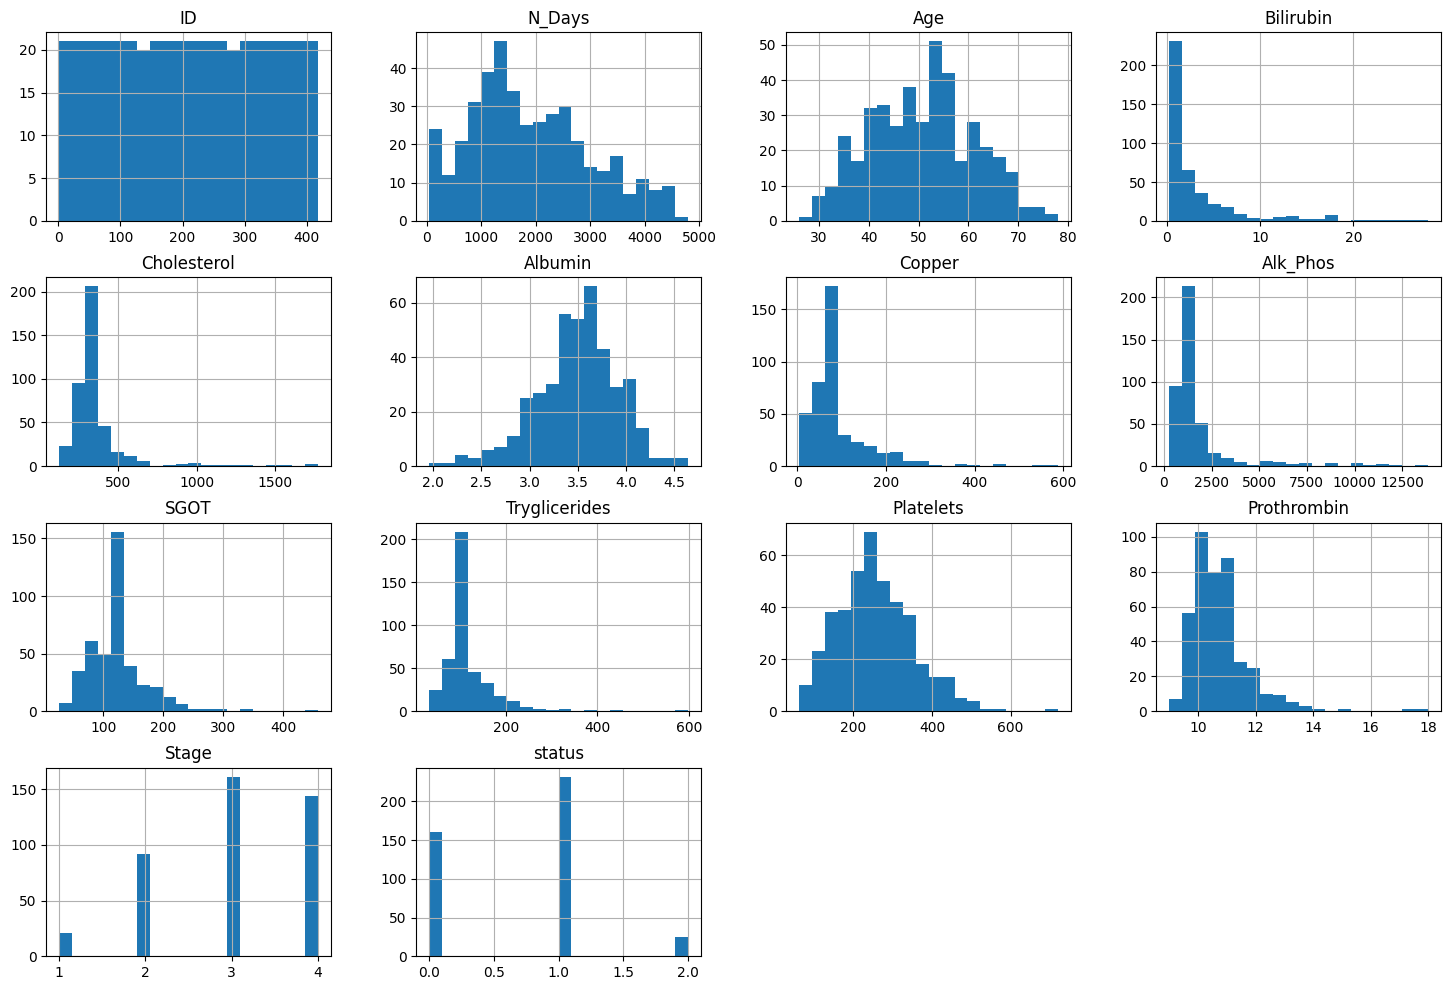

In [213]:
data.hist(bins=20, figsize=(18,12))
plt.show()

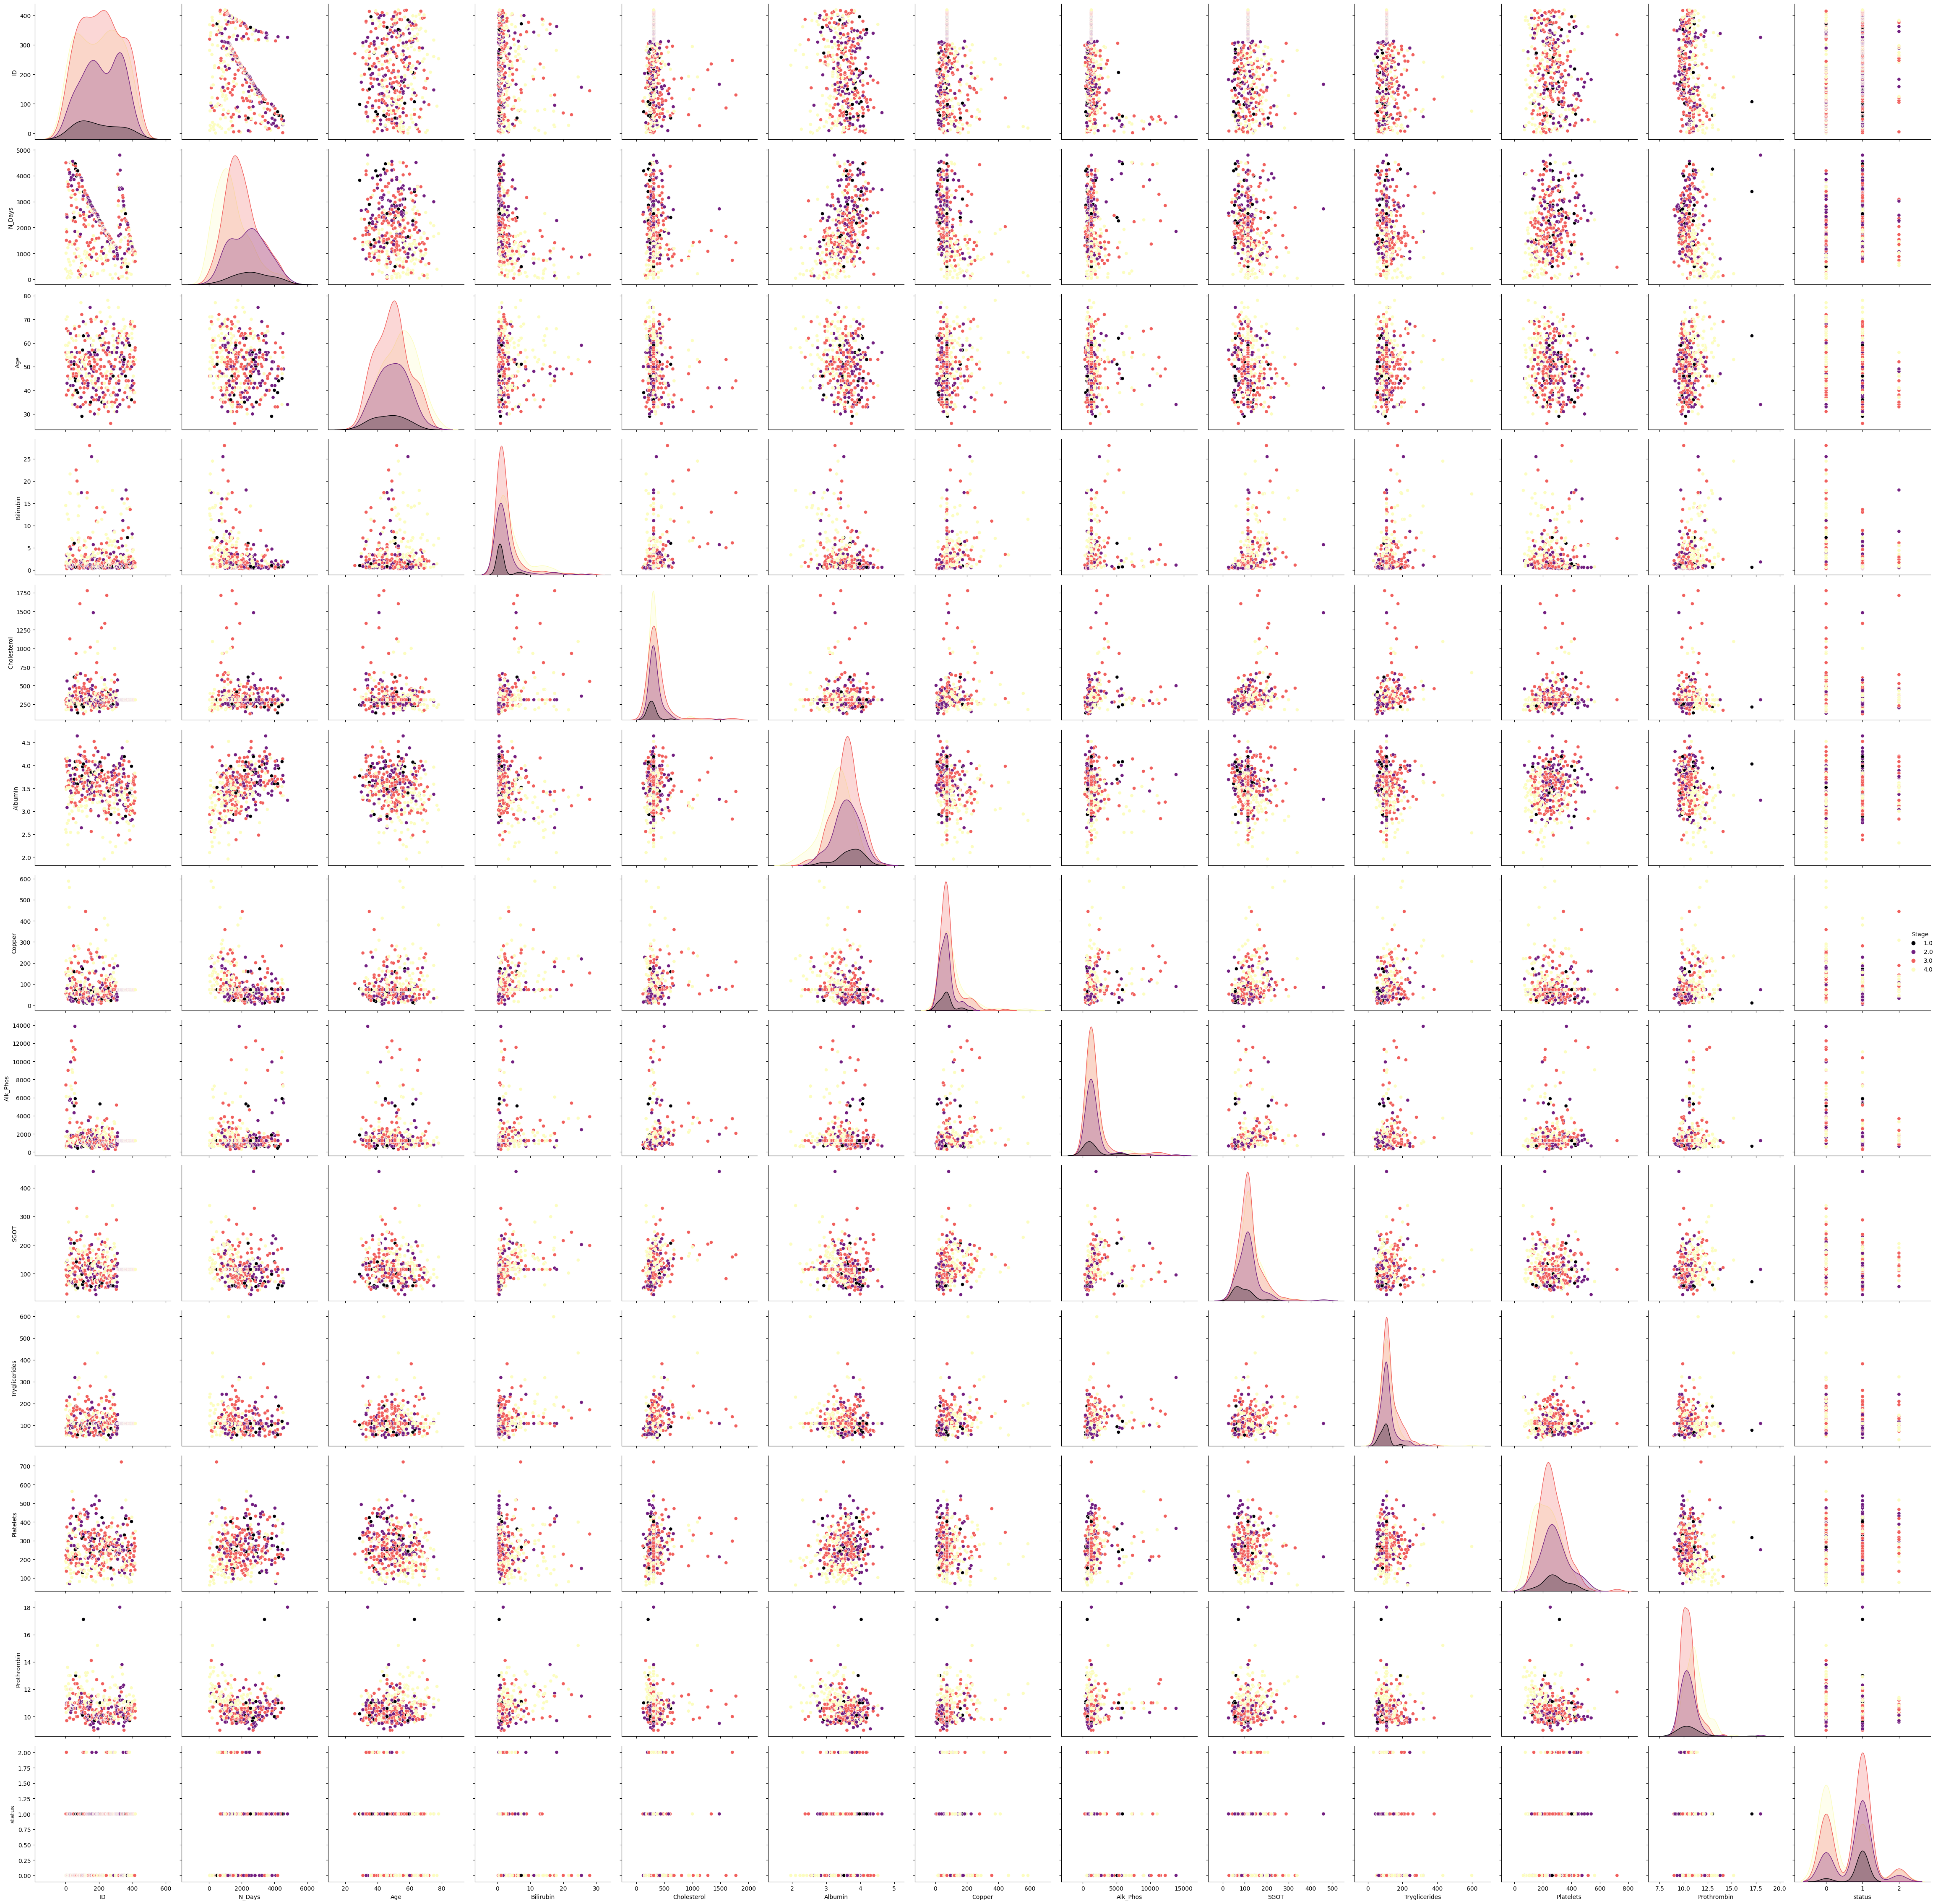

In [214]:
#make pairplot
sns.pairplot(data,hue='Stage',palette='magma',height=3.5)
plt.tight_layout()

In [218]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [224]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [225]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [229]:
import pickle

pickle.dump(data,open('cirrosis.pkl','wb'))

In [230]:
! pip install streamlit -q
! pip install pandas-profiling==3.2.0
! pip install ydata-profiling
! pip install streamlit-pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 930.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.13
    Uninstalling pydantic-1.10.13:
      Successfully uninstalled pydantic-1.10.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depe

In [231]:
!wget -q -O - ipv4.icanhazip.com

34.23.66.204


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session e3794018342dd0b


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.66.204:8501

npx: installed 22 in 4.528s
your url is: https://blue-otters-film.loca.lt
/content/app.py:8: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
2024-01-11 08:12:46.056 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 14, in <module>
    svm = pickle.load(open('SVC.pkl','rb'))
FileNotFoundError: [Errno 2] No such file or directory: 'SVC.pkl'
2024-01-11 08:14:16.949 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/di